In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms

# Use GPU if available, else use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Data transformation: Convert images to tensor and normalize them
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='C:\\user2\\datasets\\MNIST', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, shuffle=True)

testset = torchvision.datasets.MNIST(root='C:\\user2\\datasets\\MNIST', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 58052771.26it/s]


Extracting C:\user2\datasets\MNIST/MNIST/raw/train-images-idx3-ubyte.gz to C:\user2\datasets\MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1758163.31it/s]


Extracting C:\user2\datasets\MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to C:\user2\datasets\MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 14458984.63it/s]


Extracting C:\user2\datasets\MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to C:\user2\datasets\MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3686961.25it/s]

Extracting C:\user2\datasets\MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to C:\user2\datasets\MNIST/MNIST/raw



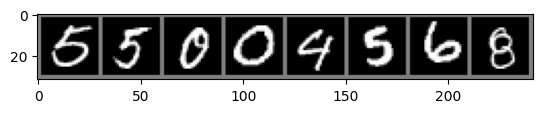

In [6]:
# Function to display images
def imshow(img):
    img = img * 0.5 + 0.5  # Denormalize the image
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

# Display the first 8 images in the batch
for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:8]))
    break

In [7]:
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),            # Flatten the 28x28 image into a vector of 784 elements
        nn.Linear(n_features, 256),  # First hidden layer with 256 neurons
        nn.ReLU(),               # Activation function
        nn.Linear(256, 10)       # Output layer (10 classes, one for each digit)
    ).to(device)
    return model

# Create the model
n_features = 28 * 28  # MNIST images are 28x28 pixels
model = getModel(n_features)

# Define optimizer and loss function
lr = 0.01
optim = SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

In [8]:
# Function to evaluate the model on the test set
def evaluate(model, testloader, criterion):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation during evaluation
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [9]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        optim.zero_grad()  # Reset gradients

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        loss.backward()  # Backpropagation
        optim.step()     # Update weights

    # Calculate accuracy and loss for the epoch
    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)

    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 2.0072, Accuracy: 48.56%, Test Loss: 1.7174, Test Accuracy: 69.87%
Epoch [2/10], Loss: 1.4805, Accuracy: 73.65%, Test Loss: 1.2344, Test Accuracy: 78.83%
Epoch [3/10], Loss: 1.0904, Accuracy: 79.75%, Test Loss: 0.9347, Test Accuracy: 82.16%
Epoch [4/10], Loss: 0.8606, Accuracy: 82.64%, Test Loss: 0.7613, Test Accuracy: 84.04%
Epoch [5/10], Loss: 0.7252, Accuracy: 84.13%, Test Loss: 0.6563, Test Accuracy: 85.88%
Epoch [6/10], Loss: 0.6394, Accuracy: 85.22%, Test Loss: 0.5863, Test Accuracy: 86.62%
Epoch [7/10], Loss: 0.5809, Accuracy: 86.03%, Test Loss: 0.5378, Test Accuracy: 87.35%
Epoch [8/10], Loss: 0.5390, Accuracy: 86.65%, Test Loss: 0.5017, Test Accuracy: 87.83%
Epoch [9/10], Loss: 0.5068, Accuracy: 87.16%, Test Loss: 0.4734, Test Accuracy: 88.18%
Epoch [10/10], Loss: 0.4822, Accuracy: 87.58%, Test Loss: 0.4520, Test Accuracy: 88.46%


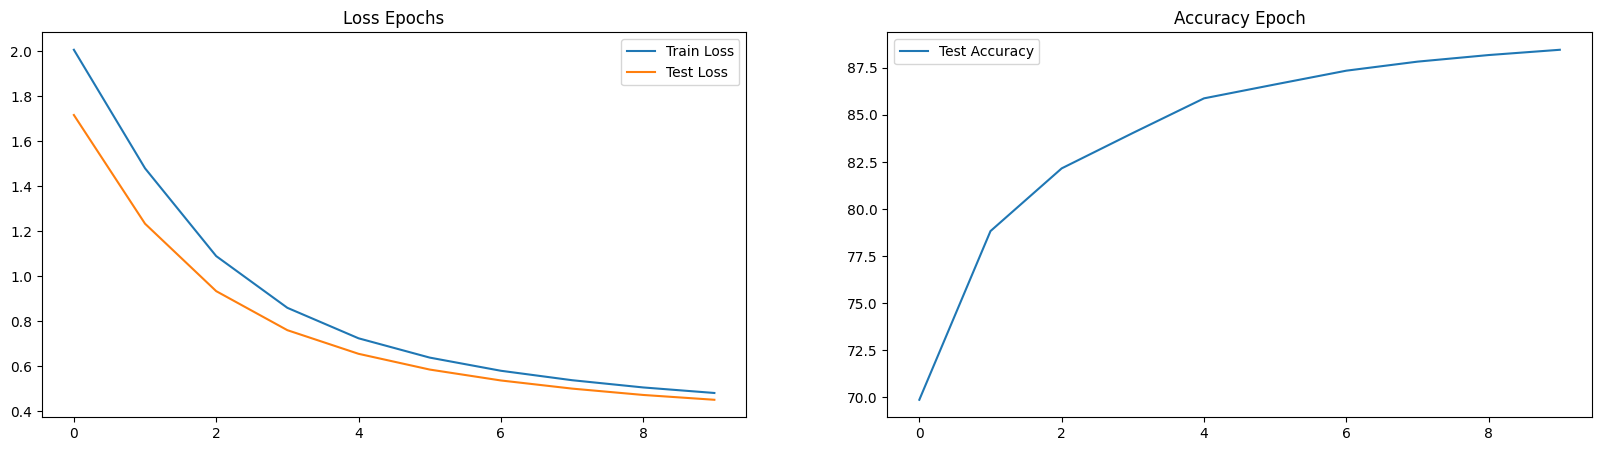

In [10]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.show()

In [11]:
# Save the model weights
torch.save(model, "MLP_mnist.pth")